### Gmarket
- 베스트 상품 200개 데이터 수집
- 상품의 이미지 200개 다운로드

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import requests
from bs4 import BeautifulSoup

#### 1. URL 찾기

In [2]:
url = 'https://www.gmarket.co.kr/n/best'

#### 2. request > response : str(html)

In [3]:
response = requests.get(url)
response

<Response [200]>

#### 3. bs > DataFrame

In [5]:
dom = BeautifulSoup(response.text, 'html.parser')

In [11]:
selector = '#gBestWrap > div.best-list > ul > li'
elements = dom.select(selector)
element = elements[0]

In [23]:
data = {
    'title':element.select_one('.itemname').text,
    'img':element.select_one('img').get('src'),
    'sprice':element.select_one('.s-price').text
}
data

{'title': '[오리온]고래송이 미니믹스 20P 560g (고래밥 10P+초코송이 10P)',
 'img': '//gdimg.gmarket.co.kr/1907380427/still/300?ver=20230905',
 'sprice': '할인가9,500원 '}

In [30]:
items = []

for element in elements:
    items.append({
        'title':element.select_one('.itemname').text,
        'img':'https:' + element.select_one('img').get('src'),
        'sprice':element.select_one('.s-price').text
    })

len(items), items[:2]

(200,
 [{'title': '자연산 손질 통 오징어 10미(1.3kg내외)',
   'img': 'https://gdimg.gmarket.co.kr/3106295509/still/300?ver=20230905',
   'sprice': '할인가24,500원 30%'},
  {'title': '[언더아머](신세계타임스퀘어점패션관)(best)UA 우븐 그래픽 쇼츠  가벼운 루즈핏 반바지 일상복 트레이닝복 헬스...',
   'img': 'https://gdimg.gmarket.co.kr/2900270518/still/300?ver=20230905',
   'sprice': '할인가25,500원 15%'}])

#### 4. To Dataframe

In [31]:
df = pd.DataFrame(items)
df.head()

,title,img,sprice
0,자연산 손질 통 오징어 10미(1.3kg내외),https://gdimg.gmarket.co.kr/3106295509/still/3...,"할인가24,500원 30%"
1,[언더아머](신세계타임스퀘어점패션관)(best)UA 우븐 그래픽 쇼츠 가벼운 루즈...,https://gdimg.gmarket.co.kr/2900270518/still/3...,"할인가25,500원 15%"
2,[블랙독]최종2.8만 (1+1) 블랙독 캠핑 수납백 다용도 멀티 칸막이 수납 가방 ...,https://gdimg.gmarket.co.kr/2989880552/still/3...,"할인가36,700원 26%"
3,[오뚜기]리얼 프렌치 크로크무슈 갈릭고르곤졸라(130Gx4) x2봉,https://gdimg.gmarket.co.kr/2428887801/still/3...,"할인가25,900원"
4,[CJ제일제당]크레잇 아메리칸포크소시지 950g x2,https://gdimg.gmarket.co.kr/2845754398/still/3...,"할인가24,150원 30%"


#### 5. 이미지 수집

In [24]:
path = 'imgs'

In [32]:
link = df.loc[0, 'img']
link

'https://gdimg.gmarket.co.kr/3106295509/still/300?ver=20230905'

In [33]:
response = requests.get(link)
response

<Response [200]>

In [34]:
with open(f'{path}/test.jpg', 'wb') as file:
    file.write(response.content)

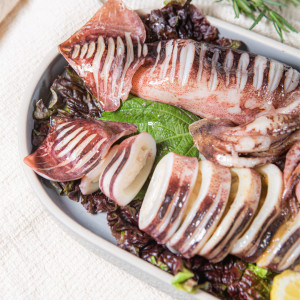

In [35]:
from PIL import Image as pil
pil.open(f'{path}/test.jpg')